In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [136]:
inf=pd.read_csv('INF.csv')
exp=pd.read_csv('export.csv')
imp=pd.read_csv('import.csv')
pup=pd.read_csv('populations.csv')
gdp=pd.read_csv('GDP.csv')

In [137]:
inf.tail()

,Date,Inflation Rate (%)
56,2016,15.6753
57,2017,16.5235
58,2018,12.0947
59,2019,11.3968
60,2020,12.8800


In [138]:
inf.drop(60,inplace = True)

In [139]:
exp.tail()

,date,export_billi,% of GDP
55,12/31/2015,51.923947,10.6663
56,12/31/2016,37.301081,9.2181
57,12/31/2017,49.491680,13.1716
58,12/31/2018,61.552169,15.4969
59,12/31/2019,63.726878,14.2209


In [140]:
df1=exp[['export_billi']]

In [141]:
df1.head()

,export_billi
0,0.387783
1,0.410318
2,0.405957
3,0.453487
4,0.510978


In [142]:
imp.tail()

,date,importation,per_of_GDP
55,12/31/2015,51.924106,10.6663
56,12/31/2016,46.552592,11.5044
57,12/31/2017,49.508493,13.1760
58,12/31/2018,69.551805,17.5109
59,12/31/2019,88.741069,19.8030


In [143]:
imp.drop('per_of_GDP',axis =1,inplace=True)

In [144]:
imp.drop('date',axis =1,inplace=True)

In [145]:
imp.head()

,importation
0,0.710188
1,0.728148
2,0.665719
3,0.699268
4,0.855867


In [156]:
pup.head(11)

,Population
10,45138458
11,46063563
12,47029822
13,48032934
14,49066760
15,50127921
16,51217973
17,52342233
18,53506196
19,54717039


In [147]:
pup.drop([0,1,2,3,4,5,6,7,8,9,60],inplace =True)

In [148]:
pup.reset_index(drop = True)

,date,Population
0,12/31/1960,45138458
1,12/31/1961,46063563
2,12/31/1962,47029822
3,12/31/1963,48032934
4,12/31/1964,49066760
5,12/31/1965,50127921
6,12/31/1966,51217973
7,12/31/1967,52342233
8,12/31/1968,53506196
9,12/31/1969,54717039


In [149]:
pup.drop('date',axis =1,inplace=True)

In [162]:
pup.head()

,Population
10,45138458
11,46063563
12,47029822
13,48032934
14,49066760


In [165]:
f = pup.reset_index(drop = True)

In [166]:
f.head()

,Population
0,45138458
1,46063563
2,47029822
3,48032934
4,49066760


In [152]:
gdp.drop('date',axis=1,inplace=True)

In [153]:
gdp.head()

,GDP_billions
0,4.196092
1,4.467200
2,4.909303
3,5.165489
4,5.552822


In [167]:
GDP= pd.concat([inf, df1,imp,f,gdp], axis=1)

In [168]:
GDP

,Date,Inflation Rate (%),export_billi,importation,Population,GDP_billions
0,1960,5.4443,0.387783,0.710188,45138458,4.196092
1,1961,6.2791,0.410318,0.728148,46063563,4.467200
2,1962,5.2656,0.405957,0.665719,47029822,4.909303
3,1963,-2.6947,0.453487,0.699268,48032934,5.165489
4,1964,0.8568,0.510978,0.855867,49066760,5.552822
5,1965,4.1035,0.639927,0.940921,50127921,5.874423
6,1966,9.6903,0.663027,0.930981,51217973,6.366793
7,1967,-3.7263,0.576368,0.905922,52342233,5.203136
8,1968,-0.4761,0.516310,0.818424,53506196,5.200896
9,1969,10.1560,0.755705,1.023660,54717039,6.634187


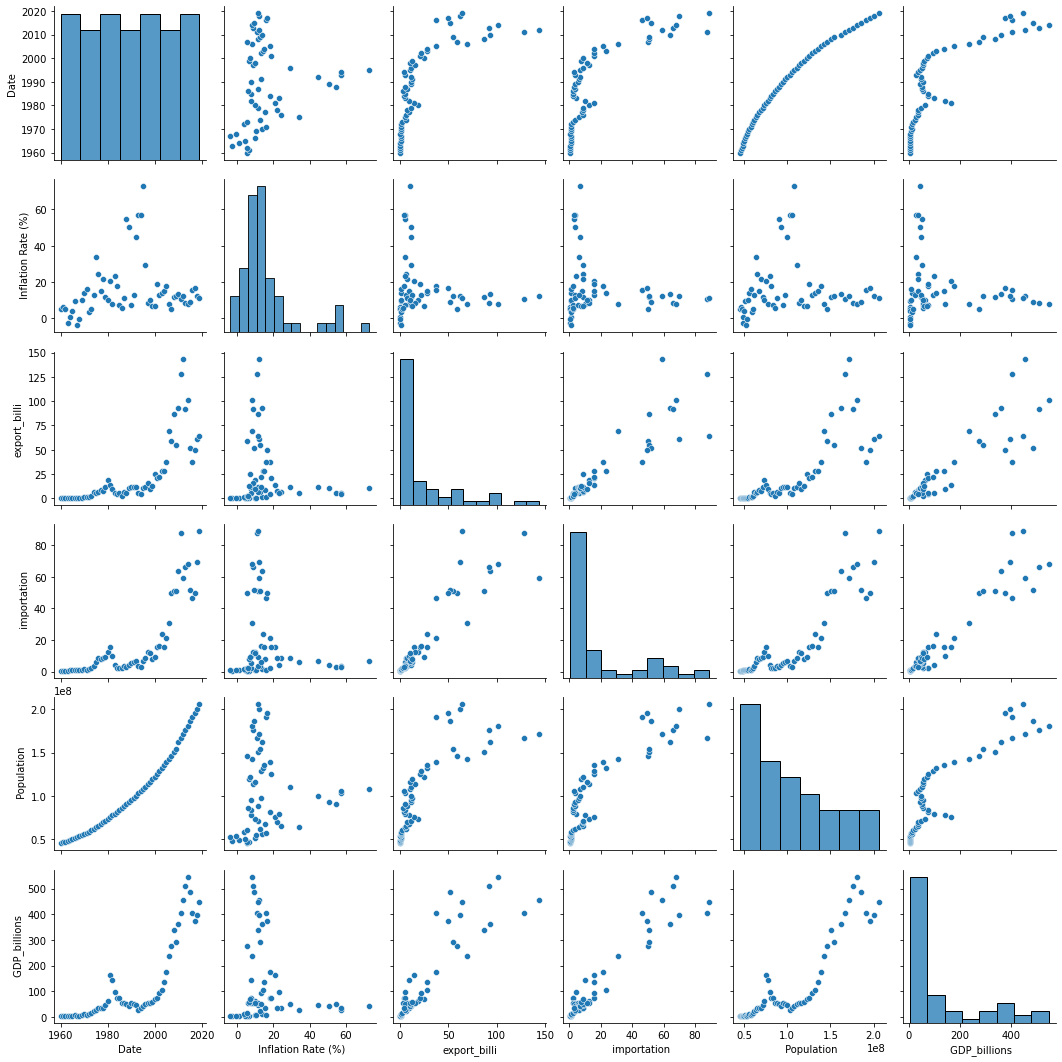

In [169]:
sns.pairplot(GDP)

In [170]:
GDP.columns

Index(['Date', ' Inflation Rate (%)', 'export_billi', ' importation',
       ' Population', ' GDP_billions'],
      dtype='object')

In [171]:
x =GDP[[' Inflation Rate (%)', 'export_billi', ' importation',' Population']]
y = GDP[' GDP_billions']

In [174]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [175]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [176]:
print(lr.coef_)

[-7.12964264e-01  9.67681213e-01  2.34251601e+00  1.42857273e-06]


In [177]:
print(lr.intercept_)

-73.36413333550414


In [179]:
coef = pd.DataFrame(data =lr.coef_, index= x.columns, columns=['Coefficients'] )

In [180]:
coef

,Coefficients
Inflation Rate (%),-0.712964
export_billi,0.967681
importation,2.342516
Population,0.000001


In [181]:
predictions = lr.predict(x_test)

In [182]:
predictions

array([122.79856762, 149.715078  ,  -7.9805019 , 336.19863994,
       388.71871283, 173.18330211,  46.85942514,  55.08556649,
       141.69723157,  59.12108612,  40.01733938, 416.34965192,
       264.0134345 ,  -0.74749279,  52.85703573,  95.86563408,
        70.15797766,   1.11828738])

In [184]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMsE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 35.43537735792266
MSE: 2181.1443988905135
RMsE: 46.70272367743142


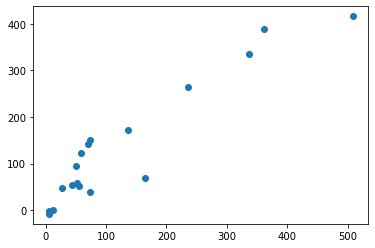

In [183]:
plt.scatter(y_test,predictions)

In [185]:
finalgdp = pd.DataFrame({'Actual': y_test, 'Predicted' : predictions})

In [186]:
finalgdp

,Actual,Predicted
39,59.372613,122.798568
41,74.030364,149.715078
2,4.909303,-7.980502
48,337.035513,336.198640
50,361.456622,388.718713
44,136.385979,173.183302
33,27.752204,46.859425
35,44.062466,55.085566
40,69.448757,141.697232
27,52.676042,59.121086
